In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#import data
test = pd.read_csv("mnist_test.csv")
data = pd.read_csv("mnist_train.csv")

In [3]:
#scaling the data
y_train = np.array(data).T[0]
x_train = np.array(data).T[1:]
x_train = x_train/255

Y_test = np.array(test).T[0]
x_test = np.array(test).T[1:]
x_test = x_test/255

In [4]:
#intializing model parameters
def init_param():
    w1 = np.random.rand(50,784)-0.5
    b1 = np.random.rand(50,1)-0.5
    w2 = np.random.rand(30,50)-0.5
    b2 = np.random.rand(30,1)-0.5
    w3 = np.random.rand(10,30)-0.5
    b3 = np.random.rand(10,1)-0.5
    return w1,b1,w2,b2,w3,b3

def reLU(x):
    return np.maximum(x,0)

def sofmax(x):
    a = x - np.max(x,0)
    return np.exp(a)/sum(np.exp(a))

#forward propagation
def forward_p(w1,b1,w2,b2,w3,b3,X):
    l1 = w1.dot(X)+b1
    z1 = reLU(l1)
    l2 = w2.dot(z1)+b2
    z2 = reLU(l2)
    l3 = w3.dot(z2)+b3
    z3 = sofmax(l3)
    return l1,z1,l2,z2,l3,z3

def deriv_reLU(x):
    return x > 0

def one_hot(y):
    Y = np.zeros((y.max()+1,y.size))
    Y[y,np.arange(y.size)] = 1
    return Y

#back propagation
def back_p(l1,z1,w2,l2,z2,w3,z3,X,Y):
    n = np.size(Y)
    Y = one_hot(Y)
    dz3 = z3-Y
    dw3 = 1/n*dz3.dot(z2.T)
    db3 = 1/n*np.sum(dz3)
    dz2 = w3.T.dot(dz3) * deriv_reLU(l2)
    dw2 = 1/n*dz2.dot(z1.T)
    db2 = 1/n*np.sum(dz2)
    dz1 = w2.T.dot(dz2) * deriv_reLU(l1)
    dw1 = 1/n*dz1.dot(X.T)
    db1 = 1/n*np.sum(dz1)
    return dw1,db1,dw2,db2,dw3,db3

#adjusting weights and biases
def adj_param(db1,dw1,db2,dw2,db3,dw3,w1,b1,w2,b2,w3,b3,rate):
    w1 = w1 - dw1*rate
    b1 = b1 - db1*rate
    w2 = w2 - dw2*rate
    b2 = b2 - db2*rate
    w3 = w3 - dw3*rate
    b3 = b3 - db3*rate
    return w1,b1,w2,b2,w3,b3

In [5]:
def get_predictions(z3):
    return np.argmax(z3,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X,Y,iterations,rate):
    w1,b1,w2,b2,w3,b3 = init_param()
    for i in range(iterations):
        l1,z1,l2,z2,l3,z3 = forward_p(w1,b1,w2,b2,w3,b3,X)
        dw1,db1,dw2,db2,dw3,db3 = back_p(l1,z1,w2,l2,z2,w3,z3,X,Y)
        w1,b1,w2,b2,w3,b3 = adj_param(db1,dw1,db2,dw2,db3,dw3,w1,b1,w2,b2,w3,b3,rate)
        if i%50 == 0:
            print("Iteration: ",i)
            print("Accuracy: ",get_accuracy(get_predictions(z3),Y))
    return w1,b1,w2,b2,w3,b3

In [6]:
w1,b1,w2,b2,w3,b3 = gradient_descent(x_train,y_train,1001,0.1)

Iteration:  0
[3 4 2 ... 3 1 4] [5 0 4 ... 5 6 8]
Accuracy:  0.10365
Iteration:  50
[5 0 4 ... 5 2 8] [5 0 4 ... 5 6 8]
Accuracy:  0.6514666666666666
Iteration:  100
[5 0 4 ... 5 2 5] [5 0 4 ... 5 6 8]
Accuracy:  0.7722666666666667
Iteration:  150
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
Accuracy:  0.8206166666666667
Iteration:  200
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
Accuracy:  0.8464333333333334
Iteration:  250
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
Accuracy:  0.86145
Iteration:  300
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
Accuracy:  0.87385
Iteration:  350
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
Accuracy:  0.8793166666666666
Iteration:  400
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
Accuracy:  0.88765
Iteration:  450
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
Accuracy:  0.8935333333333333
Iteration:  500
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
Accuracy:  0.8976666666666666
Iteration:  550
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
Accuracy:  0.9014166666666666
Iteration:  600
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
Accuracy:  

In [7]:
def make_predictions(X,w1,b1,w2,b2,w3,b3):
    _,_,_,_,_,z3 = forward_p(w1,b1,w2,b2,w3,b3,X)
    predictions = get_predictions(z3)
    return predictions

def test_prediction(index, w1,b1,w2,b2,w3,b3):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1,b1,w2,b2,w3,b3)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


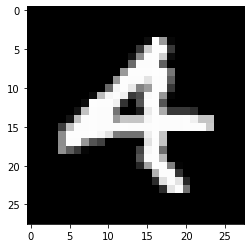

Prediction:  [7]
Label:  7


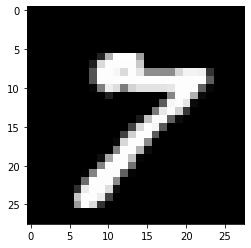

Prediction:  [0]
Label:  0


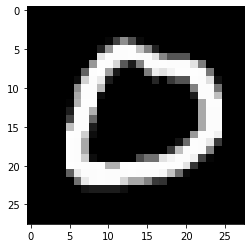

Prediction:  [7]
Label:  7


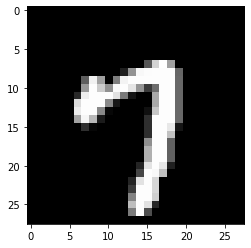

In [8]:
x = 0
while x < 4:
    test_prediction(np.random.randint(0,x_train.shape[1]), w1,b1,w2,b2,w3,b3)
    x += 1

In [9]:
#Finding accuracy using test data
dev_predictions = make_predictions(x_test, w1,b1,w2,b2,w3,b3)
get_accuracy(dev_predictions, Y_test)

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


0.9218